In [ ]:
import numpy as np
import cv2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
Fruits = ['Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3','Apple Red 1', 'Apple Red 2', 'Apple Red 3', 
          'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red Delicious', 
          'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 
          'Banana Red', 'Banana Lady Finger', 'Beetroot', 
          'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2',
          'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 
          'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow',
          'Chestnut', 'Clementine', 'Cocos', 'Dates', 'Eggplant', 
          'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White',
          'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 
          'Huckleberry', 'Kiwi', 'Kaki', 'Kohlrabi', 
          'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 
          'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Kumquats',
          'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Nectarine Flat',
          'Nut Forest', 'Nut Pecan', 'Onion Red', 'Onion White', 'Onion Red Peeled',
          'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Peach 2', 'Peach Flat',
          'Pepino', 'Pear', 'Pear Abate','Pear Forelle', 'Pear Kaiser', 'Pear Monster', 'Pear Red', 'Pear Williams',
          'Pepper Red', 'Pepper Green', 'Pepper Yellow', 
          'Physalis', 'Physalis with Husk', 'Pineapple', 'Pineapple Mini', 
          'Pitahaya Red', 'Plum', 'Plum 2', 'Plum 3', 
          'Pomegranate', 'Pomelo Sweetie', 'Potato Red', 'Potato Red Washed', 'Potato Sweet', 'Potato White', 
          'Quince', 'Rambutan', 'Raspberry', 'Redcurrant', 'Salak', 
          'Strawberry', 'Strawberry Wedge', 'Tamarillo', 'Tangelo', 
          'Tomato 1', 'Tomato 2', 'Tomato 3', 'Tomato 4', 'Tomato Cherry Red', 'Tomato Maroon', 'Tomato Yellow', 'Walnut', 
           ]

In [ ]:
len(Fruits)

In [ ]:
fruit_images = []
labels = [] 


#Get Training Data
for dirname, _, filenames in os.walk('/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/'):
    fruit_label = dirname.split("/")[-1]
    #if current fruit is in the 'Fruits' array defined above
    #then get all the data
    if fruit_label in Fruits:
        for filename in filenames: 
            path = os.path.join(dirname, filename) 
            image = cv2.imread(path, cv2.IMREAD_COLOR)
            image = cv2.resize(image, (45, 45)) 
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            fruit_images.append(image) 
            labels.append(fruit_label)
        

In [ ]:
fruit_images = np.array(fruit_images)
labels = np.array(labels)

In [ ]:
ltoi = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in ltoi.items()}

In [ ]:
id_to_label_dict

In [ ]:
label_ids = np.array([ltoi[x] for x in labels])
#count =0
#for i in label_ids:
 #   print(i)
  #  count=count+1
#print(count)    


Scale Data Images

In [ ]:
scaler = StandardScaler()


In [ ]:
images_scaled = scaler.fit_transform([i.flatten() for i in fruit_images])


Data in 50D

In [ ]:
pca = PCA(n_components=50)
pca_result = pca.fit_transform(images_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_result, label_ids, test_size=0.25, random_state=42)

Get Validation Data

In [ ]:
validation_fruit_images = []
validation_labels = [] 

for dirname, _, filenames in os.walk('/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/'):
    fruit_label = dirname.split("/")[-1]
    if fruit_label in Fruits:
        for filename in filenames: 
            image_path = os.path.join(dirname, filename) 
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)

            image = cv2.resize(image, (45, 45))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            validation_fruit_images.append(image)
            validation_labels.append(fruit_label)

validation_fruit_images = np.array(validation_fruit_images)
validation_labels = np.array(validation_labels)

In [ ]:
len(validation_fruit_images)

In [ ]:
validation_label_ids = np.array([ltoi[x] for x in validation_labels])


In [ ]:
validation_images_scaled = scaler.transform([i.flatten() for i in validation_fruit_images])

In [ ]:
validation_pca_result = pca.transform(validation_images_scaled)

In [ ]:
#debug
print(len(X_train), len(y_train), len(X_test), len(y_test) )
print(type(X_train), type(y_train), type(X_test), type(y_test) )
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape )

# K-Nearest Neighbours
Evaluated for different k values

In [ ]:
train_accuracy = dict()
test_accuracy = dict()
k_values = []
for k in range(1, len(Fruits), 10):
    k_values.append(k)

print('begin training')
for k in k_values:
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[k] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[k] = knn.score(X_test, y_test)
    
    print(k, train_accuracy[k], test_accuracy[k])
print('end training')

In [ ]:
#OUTPUT
# begin training
# 1 1.0 0.9997909116253136
# 11 0.9958644083548245 0.9939364371340953
# 21 0.9843405125345601 0.9784638974073041
# 31 0.96970330614995 0.9651519375522721
# 41 0.9565995213865849 0.9516308893225537
# 51 0.942891661439093 0.9372037914691943
# 61 0.9284403243419066 0.9227766936158349
# 71 0.9156850444924607 0.9102313911346529
# 81 0.902860063660231 0.8968497351547254
# 91 0.8908714946214075 0.8852801784220797
# 101 0.8797425710369183 0.872177306941734
# 111 0.8697288631769708 0.8616531920825202
# end training

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(k_values, test_accuracy, label='Testing Accuracy')
plt.plot(k_values, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:

# knn = KNeighborsClassifier(n_neighbors=1)
# knn.fit
# knn.fit(X_train,y_train)    

# test_predictions = knn.predict(X_test)
# #print(V1.predict(X_test))
# precision = accuracy_score(test_predictions, y_test) * 100
# print("Accuracy with knn: {0:.6f}".format(precision))
# test_predictions = knn.predict(validation_pca_result)
# precision = accuracy_score(test_predictions, validation_label_ids) * 100
# print("Validation Accuracy with knn: {0:.6f}".format(precision))
#print(confusion_matrix(y_test,predict_test))

# SVM

In [ ]:

svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Default SVM | Accuracy:', metrics.accuracy_score(y_test,y_pred))

svc = SVC(kernel = 'linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

svc = SVC(kernel = 'rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

svc = SVC(kernel = 'poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)



Random Forest Classifier

1 estimator

In [ ]:
forest = RandomForestClassifier(n_estimators=1)
forest = forest.fit(X_train, y_train)

In [ ]:
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)


In [ ]:
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

5 estimator

In [ ]:
forest = RandomForestClassifier(n_estimators=5)
forest = forest.fit(X_train, y_train)

In [ ]:
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)



In [ ]:
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

10 estimator

In [ ]:
forest = RandomForestClassifier(n_estimators=10)
forest = forest.fit(X_train, y_train)

In [ ]:
test_predictions = forest.predict(X_test)
print(np.array(test_predictions))

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
print(test_predictions)


In [ ]:
test_predictions = forest.predict(validation_pca_result)

In [ ]:
#precision = accuracy_score(test_predictions, validation_label_ids) * 100
#print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))
#print(confusion_matrix(test_predictions,validation_label_ids))
#disp = plot_confusion_matrix(RandomForestClassifier, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues,normalize=normalize)
#disp.ax_.set_title(title)
#print(title)
#print(disp.confusion_matrix)
#print(confusion_matrix(test_predictions,validation_label_ids))
#print(classification_report(test_predictions,validation_label_ids))



In [ ]:
forest = RandomForestClassifier(n_estimators=15)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=20)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=25)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=40)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=70)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision= accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=200)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=300)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=400)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=700)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=1000)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
forest = RandomForestClassifier(n_estimators=2000)
forest = forest.fit(X_train, y_train)
test_predictions = forest.predict(X_test)

In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

In [ ]:
test_predictions = forest.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

In [ ]:
svm_clf = svm.SVC()
svm_clf = svm_clf.fit(X_train, y_train) 

In [ ]:
test_predictions = svm_clf.predict(X_test)


In [ ]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with SVM: {0:.6f}".format(precision))

Test for SVM

In [ ]:
test_predictions = svm_clf.predict(validation_pca_result)

In [ ]:
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with SVM: {0:.6f}".format(precision))

Test for Random Forest

# CNN ResNet 18

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
import os


In [ ]:
cp -r /kaggle/input/fruits/fruits-360_dataset/ /tmp

Deleting the Vegetable folders from the dataset.

In [ ]:
import shutil
i=0
vegetables=['Apple Braeburn', 'Grape White 2', 'Apple Red Yellow 1', 'Grape White 3', 'Apple Red Yellow 2', 'Grape White 4']
for dirname, _, filenames in os.walk('/tmp/fruits-360_dataset/fruits-360/Training/'): 
    if dirname.split("/")[-1] in vegetables :
        print (dirname)
        shutil.rmtree(dirname)
for dirname, _, filenames in os.walk('/tmp/fruits-360_dataset/fruits-360/Test/'): 
    if dirname.split("/")[-1] in vegetables :
        print (dirname)
        shutil.rmtree(dirname)
shutil.rmtree('/tmp/fruits-360_dataset/fruits-360/test-multiple_fruits')

In [ ]:
i=0
for dirname, _, filenames in os.walk('/tmp/fruits-360_dataset/fruits-360/Training/'): 
    i+=1
    print(dirname,i)
i=0
for dirname, _, filenames in os.walk('/tmp/fruits-360_dataset/fruits-360/Test/'): 
    i+=1
    print(dirname,i)

In [ ]:
path= '/tmp/fruits-360_dataset/fruits-360/'
test_folder='/tmp/fruits-360_dataset/fruits-360/Test'
data=ImageDataBunch.from_folder(path,size=256,valid_pct=0.2,test=test_folder ,ds_tfms=get_transforms(),bs=512).normalize(imagenet_stats)
data.show_batch(rows=2,fig_size=(1,1))

In [ ]:
 data.c, len(data.train_ds), len(data.valid_ds), len(data.test_ds)

In [ ]:
learner18=cnn_learner(data,models.resnet18,metrics=accuracy)

In [ ]:
learner18.lr_find()

In [ ]:
learner18.recorder.plot(suggestion=True)

In [ ]:
learner18.fit_one_cycle(2)

In [ ]:
learner18.unfreeze()
learner18.fit_one_cycle(5,max_lr=slice(1e-6,1e-4))
learner18.save('ResNet18 Trained Model')

In [ ]:
interp=ClassificationInterpretation.from_learner(learner18)
interp.plot_top_losses(9,figsize=(12,12))

In [ ]:
interp.plot_confusion_matrix()


In [ ]:

NN = MLPClassifier(solver='lbfgs', alpha=1e-5,
...                     hidden_layer_sizes=(5, 2), random_state=1)
...
>>> NN.fit(X_train, y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')
test_predictions = NN.predict(X_test)
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with NN: {0:.6f}".format(precision))
test_predictions = NN.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with NN: {0:.6f}".format(precision))

In [ ]:
V1= VotingClassifier(estimators=[('knn', knn), ('svm', svc), ('rf', forest)], voting='soft')
V1.fit(X_train,y_train)
test_predictions = V1.predict(X_test)
#print(V1.predict(X_test))
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with Majority Voting: {0:.6f}".format(precision))
test_predictions = V1.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Majority Voting: {0:.6f}".format(precision))


In [ ]:
V1= VotingClassifier(estimators=[('knn', knn), ('svm', svc), ('rf', forest)], voting='hard')
V1.fit(X_train,y_train)
test_predictions = V1.predict(X_test)
print(V1.predict(X_test))
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with Majority Voting 2: {0:.6f}".format(precision))
test_predictions = V1.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Majority Voting 2: {0:.6f}".format(precision))

In [ ]:
V1= VotingClassifier(estimators=[('knn', knn), ('svm', svc), ('rf', forest)], voting='soft', weights=[1,2,1])
V1.fit(X_train,y_train)
test_predictions = V1.predict(X_test)
print(V1.predict(X_test))
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with Majority Voting: {0:.6f}".format(precision))
test_predictions = V1.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Majority Voting: {0:.6f}".format(precision))

In [ ]:
V1= VotingClassifier(estimators=[('knn', knn), ('svm', svc), ('rf', forest)], voting='hard', weights=[1,2,1])
V1.fit(X_train,y_train)
test_predictions = V1.predict(X_test)
print(V1.predict(X_test))
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with Majority Voting 4: {0:.6f}".format(precision))
test_predictions = V1.predict(validation_pca_result)
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Majority Voting 4: {0:.6f}".format(precision))

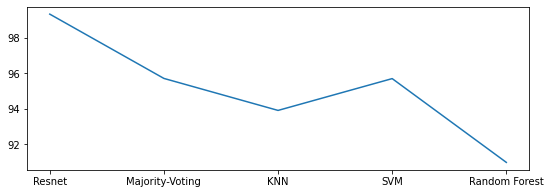